# Loan Approval Perceptron with TensorFlow/Keras
This notebook implements a multi-input single-output perceptron for predicting loan approval based on synthetic data, with training loss and accuracy plots.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


2025-07-01 10:38:29.774473: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 10:38:29.784528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751346509.795500   48272 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751346509.798836   48272 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751346509.807462   48272 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 2. Create Synthetic Dataset

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate synthetic features
n_samples = 100
income = np.random.uniform(2, 20, n_samples)  # Income in lakhs
credit_score = np.random.uniform(300, 850, n_samples)
num_loans = np.random.randint(0, 6, n_samples)
age = np.random.randint(21, 65, n_samples)
employment = np.random.randint(0, 2, n_samples)
# Define labels based on simple rule
labels = ((income > 5) & (credit_score > 600) & (employment == 1)).astype(int)
# Create DataFrame
df = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'num_loans': num_loans,
    'age': age,
    'employment': employment,
    'approved': labels
})
df.head()

,income,credit_score,num_loans,age,employment,approved
0,8.741722,317.286052,3,59,1,0
1,19.112858,650.025726,2,49,1,1
2,15.175891,472.895790,0,62,0,0
3,12.775853,579.713880,3,46,1,0
4,4.808336,799.161561,5,55,0,0


## 3. Preprocess Data

In [3]:
# Split features and target
X = df[['income','credit_score','num_loans','age','employment']].values
y = df['approved'].values
# Scale numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.astype(float))
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 4. Build and Compile Model

In [4]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(5,))
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751346511.084074   48272 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

## 5. Train Model

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.3750 - loss: 0.7324

I0000 00:00:1751346511.821103   48356 service.cc:152] XLA service 0x7cf490007150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751346511.821120   48356 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-01 10:38:31.830055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751346511.890285   48356 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751346512.012499   48356 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4235 - loss: 0.7332 - val_accuracy: 0.1250 - val_loss: 0.8213
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3860 - loss: 0.7405 - val_accuracy: 0.1250 - val_loss: 0.8207
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4397 - loss: 0.7448 - val_accuracy: 0.1250 - val_loss: 0.8204
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4710 - loss: 0.6936 - val_accuracy: 0.1250 - val_loss: 0.8203
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4453 - loss: 0.7053 - val_accuracy: 0.1250 - val_loss: 0.8204
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4517 - loss: 0.7058 - val_accuracy: 0.1250 - val_loss: 0.8203
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4584 - loss: 0.7121 - val_accuracy: 0.1250 - val_loss: 0.8205
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3972 - loss: 0.7320 - val_accuracy: 0.1875 - val_loss: 0.8207
Epoch 9/50
8/8 ━━━

## 6. Evaluate Model

In [6]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
# Confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Loss: 0.4930, Test Accuracy: 0.9000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20


Confusion Matrix:
[[18  0]
 [ 2  0]]


/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

## 7. Plot Training History

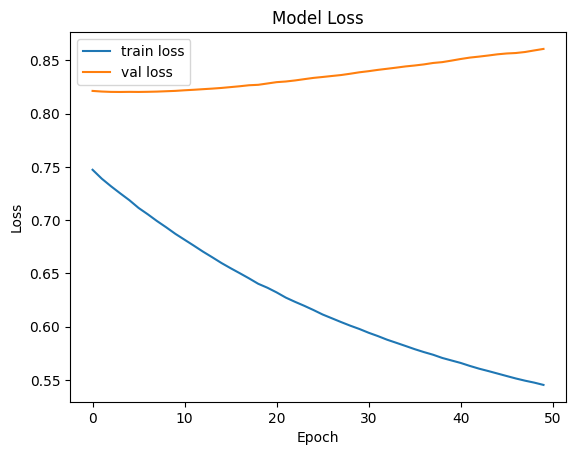

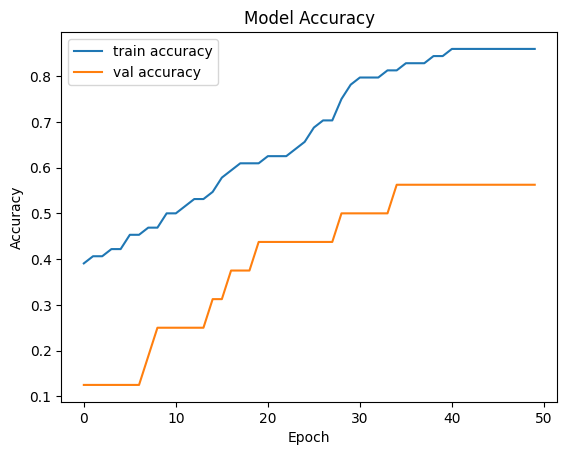

: 

In [ ]:
# Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()